<a href="https://colab.research.google.com/github/bhagyabinoy/Computer-vision/blob/master/C_05_face_Mask_Detection_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [3]:
from google.colab import files
uploaded = files.upload()


Saving kaggle.json to kaggle.json


In [4]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

In [6]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [13]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = 'face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [14]:
with_mask_files = os.listdir('/content/data/with_mask')

In [15]:
without_mask_files = os.listdir('/content/data/without_mask')

In [16]:
len(with_mask_files)

3725

In [25]:
len(without_mask_files)

3828

In [26]:
# Create labels for the image datasets
# 'with_mask_labels' will be a list containing the value 1 for each image in 'with_mask_files',
# indicating that these images represent people wearing masks.
# 'without_mask_labels' will be a list containing the value 0 for each image in 'without_mask_files',
# indicating that these images represent people not wearing masks.
# This labeling is essential for training machine learning models to distinguish between the two classes.

with_mask_labels = [1]*len(with_mask_files)
without_mask_labels = [0]*len(without_mask_files)

In [27]:
# Combine the labels for both classes into a single list
# 'labels' will contain all the labels from 'with_mask_labels' (1s) followed by all the labels
# from 'without_mask_labels' (0s), creating a unified list of labels for the dataset.
labels = with_mask_labels + without_mask_labels
print(len(labels))

7553


In [19]:
data = []

In [20]:
# Load and preprocess images of people wearing masks
# The code iterates through each image file in 'with_mask_files', opens the image,
# resizes it to 128x128 pixels, converts it to RGB format, and appends the resulting
# numpy array to the 'data' list for further processing or model training.

with_mask_path = '/content/data/with_mask/'
for img in with_mask_files:
  image = Image.open(with_mask_path + img)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [21]:
without_mask_path = '/content/data/without_mask/'
for img in without_mask_files:
  image = Image.open(without_mask_path + img)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [22]:
len(data)

7553

In [28]:
# Convert the list of images (data) and the list of labels (labels) into numpy arrays
# 'X' will be a numpy array containing all the image data, suitable for input into a model.
# 'Y' will be a numpy array containing all the corresponding labels, providing the target output for training.
X = np.array(data)
Y = np.array(labels)

In [29]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [30]:
# Split the dataset into training and testing sets
# 'X_train' and 'Y_train' will contain 80% of the data for training the model,
# while 'X_test' and 'Y_test' will contain 20% of the data for evaluating the model's performance.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [31]:
# scaling the data
X_train_scaled = X_train/255
X_test_scaled = X_test/255

**Building a Convolutional Neural Networks (CNN)**

In [5]:
from tensorflow import keras

In [32]:
# Define a Convolutional Neural Network (CNN) model for image classification
# The model consists of convolutional layers for feature extraction and dense layers for classification.

num_of_classes = 2  # Number of output classes (e.g., with mask and without mask)

model = keras.Sequential()  # Initialize a sequential model

# Convolutional Layer 1
model.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)))
# Max Pooling Layer 1
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 2
model.add(keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
# Max Pooling Layer 2
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Flatten the 3D outputs to 1D for input to dense layers
model.add(keras.layers.Flatten())

# Fully Connected Layer 1
model.add(keras.layers.Dense(128, activation='relu'))
# Dropout Layer to reduce overfitting
model.add(keras.layers.Dropout(0.5))

# Fully Connected Layer 2
model.add(keras.layers.Dense(64, activation='relu'))
# Dropout Layer to reduce overfitting
model.add(keras.layers.Dropout(0.5))

# Output Layer
model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))  # Use 'sigmoid' for binary classification


In [33]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [38]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 158s 928ms/step - acc: 0.8703 - loss: 0.3297 - val_acc: 0.9074 - val_loss: 0.2182
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 153s 900ms/step - acc: 0.9085 - loss: 0.2439 - val_acc: 0.9190 - val_loss: 0.2131
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 197s 873ms/step - acc: 0.9136 - loss: 0.2162 - val_acc: 0.9256 - val_loss: 0.2021
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 205s 891ms/step - acc: 0.9315 - loss: 0.1685 - val_acc: 0.9207 - val_loss: 0.2116
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 157s 924ms/step - acc: 0.9511 - loss: 0.1421 - val_acc: 0.9240 - val_loss: 0.1997


**Model Evaluation**

In [35]:
# Evaluate the trained neural network model on the test dataset
# This will compute the loss and accuracy of the model on the unseen test data,
# providing a measure of how well the model generalizes to new data.
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 12s 237ms/step - acc: 0.8388 - loss: 0.3600
Test Accuracy = 0.8537392616271973


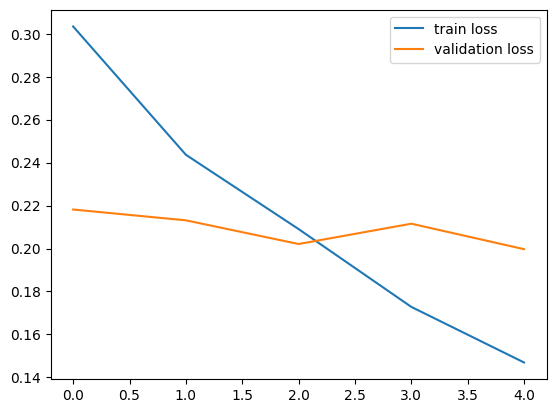

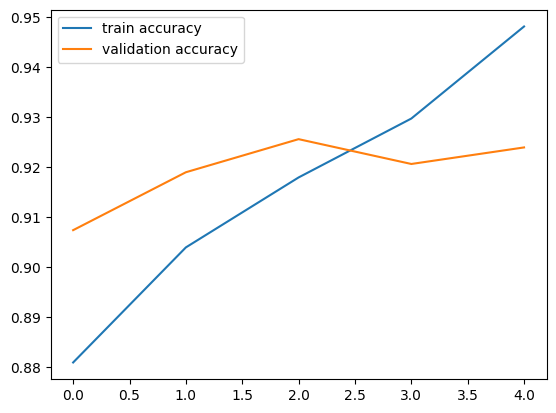

In [39]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Path of the image to be predicted: /content/data/with_mask/with_mask_10.jpg


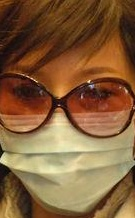

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
[[0.07883079 0.9529903 ]]
1
The person in the image is wearing a mask


In [37]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resized = cv2.resize(input_image, (128,128))
input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])
input_prediction = model.predict(input_image_reshaped)
print(input_prediction)
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

if input_pred_label == 1:
  print('The person in the image is wearing a mask')
else:
  print('The person in the image is not wearing a mask')